In [2]:
%load_ext nb_black
import cv2
import numpy as np
from scipy import misc
import sys
import matplotlib.pyplot as plt

sys.path.append("/Users/vikaspandey/my_projects/deeplearning_ai")
import tensorflow as tf
import numpy as np
from tensorflow import keras

i = misc.ascent()

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [71]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer="sgd", loss="mean_squared_error")

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=1)

print(model.predict([10.0]))

1/1 [==============================] - 0s 1ms/step - loss: 0.8271
[[15.070656]]


<IPython.core.display.Javascript object>

In [72]:
fashion_mnist = tf.keras.datasets.fashion_mnist

<IPython.core.display.Javascript object>

In [73]:
(tr_images, tr_labels), (te_images, te_labels) = fashion_mnist.load_data()
tr_images = tr_images.reshape(60000, 28, 28, 1)
te_images = te_images.reshape(10000, 28, 28, 1)

<IPython.core.display.Javascript object>

In [74]:
tr_images = tr_images / 255.0
te_images = te_images / 255.0

<IPython.core.display.Javascript object>

In [85]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(16, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

<IPython.core.display.Javascript object>

In [86]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get("loss") < 0.4:
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True


callbacks = myCallback()
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit(tr_images, tr_labels, epochs=3, callbacks=[callbacks])
test_loss = model.evaluate(te_images, te_labels)
print(test_loss)

Epoch 1/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5082 - accuracy: 0.8157
Epoch 2/3
1875/1875 [==============================] - ETA: 0s - loss: 0.3493 - accuracy: 0.8747
Reached 60% accuracy so cancelling training!
313/313 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8796
[0.3355461061000824, 0.8795999884605408]


<IPython.core.display.Javascript object>

In [77]:
model.evaluate(te_images, te_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.3014 - accuracy: 0.8864


[0.3013996481895447, 0.8863999843597412]

<IPython.core.display.Javascript object>

In [78]:
classifications = model.predict(te_images)

print(classifications[0])

[2.9094290e-06 3.4915462e-07 2.3708030e-06 1.1360828e-06 1.8304952e-06
 2.8353794e-03 1.9695665e-06 1.9839760e-02 5.4254069e-05 9.7725999e-01]


<IPython.core.display.Javascript object>

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


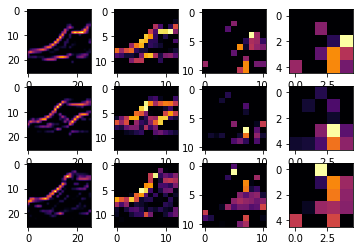

<IPython.core.display.Javascript object>

In [84]:
print(te_labels[:100])

In [83]:
import tensorflow as tf
from tensorflow.keras import models
f, axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 1
layer_output = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_output)
for x in range(0, 4):
    f1 = activation_model.predict(te_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0, x].grid(False)
    f2 = activation_model.predict(te_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1, x].grid(False)
    f3 = activation_model.predict(te_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2, x].grid(False)

In [4]:
i.shape

(512, 512)

<IPython.core.display.Javascript object>

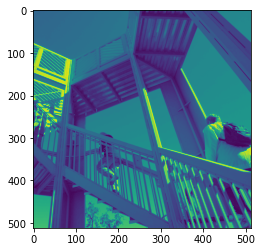

<IPython.core.display.Javascript object>

In [5]:
plt.imshow(i)

In [8]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

<IPython.core.display.Javascript object>

In [31]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

# Experiment with different values for fun effects.
# filter = [[0, 0, 0], [1, -2, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight = 1

<IPython.core.display.Javascript object>

In [32]:
for x in range(1, size_x - 1):
    for y in range(1, size_y - 1):
        convolution = 0.0
        convolution = convolution + (i[x - 1, y - 1] * filter[0][0])
        convolution = convolution + (i[x, y - 1] * filter[0][1])
        convolution = convolution + (i[x + 1, y - 1] * filter[0][2])
        convolution = convolution + (i[x - 1, y] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x + 1, y] * filter[1][2])
        convolution = convolution + (i[x - 1, y + 1] * filter[2][0])
        convolution = convolution + (i[x, y + 1] * filter[2][1])
        convolution = convolution + (i[x + 1, y + 1] * filter[2][2])
        convolution = convolution * weight
        if convolution < 0:
            convolution = 0
        if convolution > 255:
            convolution = 255
        i_transformed[x, y] = convolution

<IPython.core.display.Javascript object>

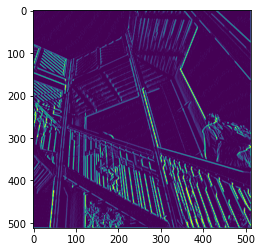

<IPython.core.display.Javascript object>

In [33]:
plt.imshow(i_transformed)